**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [3]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


**1º passo:** Dividir a área da curva em retangulos ( quanto menor a base do retangulo, mais preciso o valor da área delimitada debaixo da curva)

**2º passo:** Calcular a área de cada retangulo

**3º passo:** Somar as áreas dos retangulos que será o valor aproximado da integral, como a equação abaixo:


$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [4]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))

Espaçamento entre os dados: 0.0320570678937734


In [5]:
print("Tempos:", tempos) #imprimir a lista com os valores tempos:

Tempos: [0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936, 0.16028533946886697, 0.19234240736264038, 0.2243994752564138, 0.2564565431501872, 0.28851361104396056, 0.32057067893773394, 0.3526277468315074, 0.38468481472528077, 0.41674188261905415, 0.4487989505128276, 0.48085601840660097, 0.5129130863003744, 0.5449701541941477, 0.5770272220879211, 0.6090842899816945, 0.6411413578754679, 0.6731984257692414, 0.7052554936630148, 0.7373125615567881, 0.7693696294505615, 0.8014266973443349, 0.8334837652381083, 0.8655408331318817, 0.8975979010256552, 0.9296549689194286, 0.9617120368132019, 0.9937691047069753, 1.0258261726007487, 1.0578832404945222, 1.0899403083882955, 1.121997376282069, 1.1540544441758422, 1.1861115120696157, 1.218168579963389, 1.2502256478571625, 1.2822827157509358, 1.3143397836447093, 1.3463968515384828, 1.378453919432256, 1.4105109873260295, 1.4425680552198028, 1.4746251231135763, 1.5066821910073496, 1.538739258901123, 1.5707963267948966]


In [6]:
print("Dados:", dados) #imprimir a lista com os valores dados:

Dados: [1.0, 0.9994862162006879, 0.9979453927503363, 0.9953791129491982, 0.9917900138232462, 0.9871817834144502, 0.9815591569910653, 0.9749279121818236, 0.9672948630390295, 0.9586678530366606, 0.9490557470106686, 0.9384684220497604, 0.9269167573460217, 0.9144126230158125, 0.9009688679024191, 0.8865993063730001, 0.8713187041233894, 0.8551427630053462, 0.8380881048918407, 0.820172254596956, 0.8014136218679567, 0.7818314824680298, 0.7614459583691344, 0.7402779970753156, 0.7183493500977276, 0.6956825506034865, 0.6723008902613169, 0.6482283953077885, 0.6234898018587336, 0.598110530491216, 0.5721166601221697, 0.5455349012105487, 0.5183925683105252, 0.4907175520039379, 0.4625382902408354, 0.4338837391175582, 0.404783343122394, 0.3752670048793742, 0.3453650544213078, 0.31510821802362077, 0.28452758663103267, 0.2536545839095075, 0.22252093395631445, 0.19115862870137248, 0.15959989503337932, 0.12787716168450622, 0.09602302590768189, 0.06407021998071318, 0.03205157757165533, 6.123233995736766e-17

Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

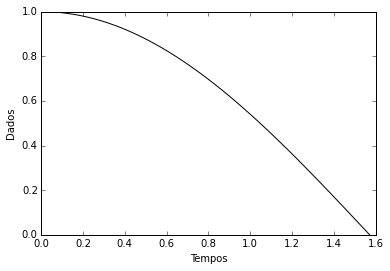

In [7]:
plt.figure()
plt.plot(tempos, dados,"-k", label="Dados")
plt.xlabel("Tempos")
plt.ylabel("Dados")

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [8]:
lista_de_area = [] #lista vazia, onde será adicionados o valores da área de cada retangulo
for valor in dados: #para cada valor de dados
    area =  valor * intervalo #a área será a multiplicação do valor pelo intervalo (Espaçamento entre os dados: 0.0320570678937734)
    lista_de_area.append(area) #será adicionado a lista vazia cada valor gerado pelo comando da linha acima
print("Área", lista_de_area) #imprimir a lista de áreas

Área [0.0320570678937734, 0.032040597491636125, 0.03199120320967589, 0.031908935803856384, 0.03179387980949826, 0.03164615345441334, 0.03146590853741756, 0.03125333027234747, 0.031008637097740408, 0.030732080452374206, 0.030423944516896832, 0.03008454592181156, 0.0297142334221177, 0.02931338753894132, 0.028882420168524006, 0.028421774158971666, 0.02793192285519815, 0.027413369612531355, 0.02686664727948162, 0.026292317650203817, 0.02569097088721593, 0.025063224914967135, 0.024409724784878694, 0.023731142012509976, 0.02302817388753085, 0.022301542757209414, 0.021551995284151335, 0.020780301679053557, 0.019987254909260746, 0.019173669883937733, 0.018340382616695274, 0.017488249366529523, 0.01661814575795807, 0.015730965881256515, 0.014827621373720326, 0.013909040482895827, 0.012976167112743157, 0.012029959853711091, 0.01107139099772061, 0.010101445539069161, 0.009121120162282507, 0.008131422217953923, 0.007133368687623438, 0.006127985138760518, 0.005116304670924148, 0.004099366854183254,

In [9]:
area = 0 # 0 indica que começara o primeiro valor
for valor in lista_de_area: # para cada valor da lista 
    area = area + valor #o valor final da área sera o valor da área mais a soma de cada valor da lista_de_area
print("Integral pela regra dos retâgulos:", area)

Integral pela regra dos retâgulos: 1.01594289451325


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [10]:
res_true = math.sin(fim) - math.sin(inicio) #int(pi/2) = math.sin(fim) - math.sin(inicio)

E = abs(res_true - area) #função para calcular o erro cometido
print("Erro cometido:", E) #imprimir erro cometido
print("Solução analítica", res_true) #imprimir a solução analítica

Erro cometido: 0.01594289451325004
Solução analítica 1.0


**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

**Responda:** O erro não pode ser zero porque as áreas calculadas não correspondem  à área do cosseno, porque 
os retângulos cobrem espaços acima  função ( linha delimitada pela função), e em outras não cobrem o espaço abaixo da curva.

### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

No método da Regra dos trapézios:

**1º passo:** Dada a função a ser integrada, divide-se o intervalo de integração (a,b) no caso (0 a π/2) em n partes iguais.

**2º passo:** Calcula-se a área de cada trapézio pela formula $\Delta \frac{d_i + d_{i+1}}{2}$

**3º passo:**
**OBS:** Sendo  $\Delta$  = o intervalo dado

**4º passo:** A soma das áreas dos trapézios será o valor aproximado da integral


### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [11]:
area_trapezios = 0 #lista começando no primeiro valor
for x in range(N-1): #Cada valor da lista, do somatório de i (de N-1)
    o = dados[x] + dados[x+1] #soma do valor de x, mais o valor de x+1
    i = intervalo*o/2  #como na formula ( $\Delta \frac{d_i + d_{i+1}}{2}$ ) multiplica o valor de o (dados[x] + dados[x+1]) pelo o intervalo e divide por 2
    area_trapezios = area_trapezios + i #a soma da área dos trapezios será a soma de todos os valor de i
print("Integral pela regra dos trapézios:", area_trapezios) #imprimir a área toral da integral pela regra dos trapézios

Integral pela regra dos trapézios: 0.9999143605663631


Calcule e imprima também a solução analíca e o erro cometido.

In [12]:
res_true = math.sin(fim) - math.sin(inicio) #int(pi/2) = math.sin(fim) - math.sin(inicio)

E = abs(res_true - area_trapezios) #função para calcular o erro cometido
print("Erro cometido:", E) #imprimir erro cometido
print("Solução analítica", res_true) #imprimir a solução analítica

Erro cometido: 8.563943363693038e-05
Solução analítica 1.0


**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

**Resposta:** o erro é menor porque a regra dos trapézios abrange melhor a área delimitada abaixo da curva, porque ela está mais proximo a figura formada 

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [34]:
# inicio e fim são os intervalos de integração
inicio = 0 # Funções trigonométricas utilizam ângulos em radianos!
fim = math.pi/2 
N_s = range(10,1000,10)
lista_erro_retangulo = []
for N in N_s:
    intervalo = (fim - inicio)/(N - 1)
    tempos_2 = []
    dados_2 = []
    
    for i in range(N):
        t = inicio + i*intervalo
        tempos_2.append(t)
        dados_2.append(math.cos(t))
        
        
        
        
    lista_de_area_2 = [] #lista vazia, onde será adicionados o valores da área de cada retangulo
        
    for valor in dados_2: #para cada valor de dados
        area_2 =  valor * intervalo
        lista_de_area_2.append(area_2)
    area_reta = 0
        
    for valor in lista_de_area_2: # para cada valor da lista 
        area_reta = area_reta + valor
    E = abs(res_true - area_reta)
    lista_erro_retangulo.append(E)
    
print("Integral pela regra dos retâgulos:", lista_erro_retangulo)
a = len(lista_erro_retangulo)
print("aaa",a)

Integral pela regra dos retâgulos: [0.0847266943914422, 0.040767105040247165, 0.026838192538866323, 0.02000322554546985, 0.01594289451325004, 0.013252764278358642, 0.011339393980260404, 0.009908802562918373, 0.00879873989603741, 0.007912335532624493, 0.007188181326510001, 0.006585464592106627, 0.006076001791466723, 0.00563970433809069, 0.005261866997297915, 0.004931477824744235, 0.004640127186015031, 0.00438128192709053, 0.004149789644384283, 0.003941532222525579, 0.0037531787092359714, 0.0035820058140862976, 0.003425765383925139, 0.0032825851113535975, 0.0031508931435173526, 0.00302936013827404, 0.002916854231957755, 0.002812405682363739, 0.0027151788455863635, 0.002624449771287507, 0.0025395881446874657, 0.0024600426222460836, 0.0023853288395463412, 0.0023150195400292173, 0.002248736399520501, 0.002186143216111436, 0.0021269402066168563, 0.002070859205313136, 0.00201765960274769, 0.0019671248948447406, 0.0019190597379299401, 0.0018732874252085363, 0.001829647715960725, 0.001787994961

In [31]:
print("Tempos:", tempos_2)

Tempos: []


In [21]:
print("Tempos:", dados_2)

Tempos: [0.9998763853811183, 0.9995055720856215, 0.9988876517893979, 0.9980227772604111, 0.996911162320932, 0.9955530817946746, 0.9939488714388522, 0.9920989278611685, 0.9900037084217638, 0.9876637311201433, 0.9850795744671115, 0.9822518773417481, 0.979181338833458, 0.9758687180691361, 0.972314834025489, 0.9685205653265598, 0.964486850026507, 0.9602146853776895, 0.955705127584117, 0.9509592915403253, 0.9459783505557424, 0.940763536064611, 0.9353161373215428, 0.9296375010827771, 0.9237290312732226, 0.9175921886393665, 0.9112284903881357, 0.9046395098117981, 0.8978268758989991, 0.8907922729320283, 0.8835374400704152, 0.8760641709209582, 0.8683743130942927, 0.8604697677481077, 0.852352489117124, 0.8440244840299503, 0.8354878114129365, 0.8267445817811464, 0.8177969567165778, 0.808647148333755, 0.7992974187328302, 0.789750079440326, 0.7800074908376583, 0.7700720615775812, 0.7599462479886976, 0.7496325534681826, 0.7391335278628711, 0.7284517668388609, 0.7175899112397879, 0.7065506464339324, 

**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.